In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing=fetch_california_housing()

1. Number of instances : 20640
2. Number of attributes : 8
3. Target:The target variable is the median house value in units of 100,000 for california districts

Attribute Information:

1. MedInc : median income in block
2. HouseAge : median house age in block
3. AveRooms : average number of blocks
4. AveBedrms : average number of bedrooms
5. Population : block population
6. AveOccup : average housing occupancy
7. Latitude : house block latitude
8. Longitude : house block longitude

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
keras.__version__

'2.14.0'

In [6]:
X=housing.data

In [7]:
y=housing.target

In [8]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)

In [9]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
X_train.shape

(11610, 8)

In [13]:
X_test.shape

(5160, 8)

In [14]:
X_valid.shape

(3870, 8)

Model Fitting


In [15]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='ReLU',input_shape=[8]),
    keras.layers.Dense(30,activation='ReLU'),
    keras.layers.Dense(1)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=['mae'])

In [18]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9456 - mae: 1.0113 - val_loss: 1.2437 - val_mae: 0.6469
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6960 - mae: 0.6128 - val_loss: 0.7471 - val_mae: 0.5887
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6162 - mae: 0.5765 - val_loss: 0.6269 - val_mae: 0.5539
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5749 - mae: 0.5537 - val_loss: 0.5912 - val_mae: 0.5405
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5458 - mae: 0.5366 - val_loss: 0.5330 - val_mae: 0.5181
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5207 - mae: 0.5237 - val_loss: 0.5068 - val_mae: 0.5065
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5015 - mae: 0.5120 - val_loss: 0.4833 - val_mae: 0.4959
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [19]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 824us/step - loss: 0.4034 - mae: 0.4544


In [20]:
model_history.history

{'loss': [1.9456449747085571,
  0.6960201263427734,
  0.6162126660346985,
  0.5748827457427979,
  0.5457620620727539,
  0.520706057548523,
  0.5015080571174622,
  0.48508962988853455,
  0.47159796953201294,
  0.4604223370552063,
  0.4515966475009918,
  0.4437267482280731,
  0.4371558129787445,
  0.43138185143470764,
  0.4262484908103943,
  0.42171117663383484,
  0.4178418219089508,
  0.41427716612815857,
  0.4103788435459137,
  0.40813785791397095],
 'mae': [1.0113003253936768,
  0.6128334403038025,
  0.5765151381492615,
  0.5537325739860535,
  0.5366197228431702,
  0.5237408876419067,
  0.5119830965995789,
  0.5031010508537292,
  0.49586883187294006,
  0.4897688329219818,
  0.4841737449169159,
  0.4797819256782532,
  0.476021945476532,
  0.47240862250328064,
  0.47002437710762024,
  0.46725884079933167,
  0.4645009934902191,
  0.4626207947731018,
  0.4596651494503021,
  0.4585021138191223],
 'val_loss': [1.2437151670455933,
  0.7471207976341248,
  0.6269192099571228,
  0.5911501049995

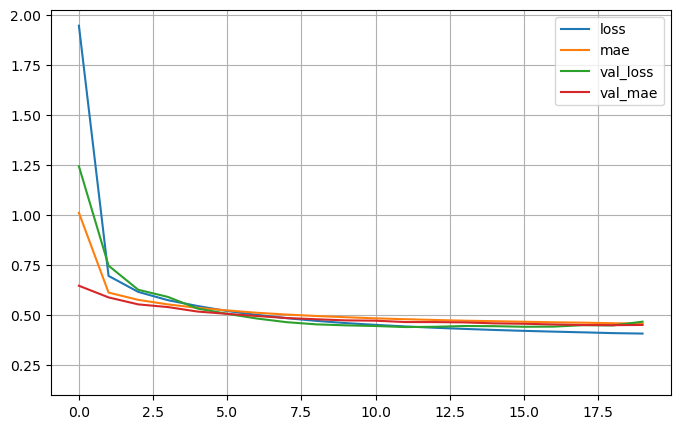

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.1)
plt.show()

In [22]:
X_new=X_test[:3]

In [23]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 52ms/step


In [24]:
y_pred

array([[0.8146409],
       [1.6920142],
       [3.6000438]], dtype=float32)

In [25]:
print(y_test[:3])

[0.477   0.458   5.00001]


In [26]:
del model

In [27]:
keras.backend.clear_session()

Functional API

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='ReLU')(input_)
hidden2 = keras.layers.Dense(30,activation='ReLU')(hidden1)
concat  = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [30]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=['mae'])

In [31]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.6514 - mae: 1.1372 - val_loss: 0.8426 - val_mae: 0.6638
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7234 - mae: 0.6289 - val_loss: 0.9295 - val_mae: 0.5979
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6432 - mae: 0.5915 - val_loss: 0.7544 - val_mae: 0.5693
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6064 - mae: 0.5719 - val_loss: 0.5944 - val_mae: 0.5510
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5764 - mae: 0.5558 - val_loss: 0.5247 - val_mae: 0.5311
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5501 - mae: 0.5434 - val_loss: 0.5347 - val_mae: 0.5202
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5284 - mae: 0.5306 - val_loss: 0.5234 - val_mae: 0.5091
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [32]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 809us/step - loss: 0.4054 - mae: 0.4581


In [33]:
model_history.history

{'loss': [2.651437759399414,
  0.7234214544296265,
  0.6431753635406494,
  0.6063740253448486,
  0.5763781070709229,
  0.5501099228858948,
  0.5283882021903992,
  0.5100319385528564,
  0.49235838651657104,
  0.47752174735069275,
  0.46520063281059265,
  0.4536770284175873,
  0.4444042444229126,
  0.43635764718055725,
  0.4295674264431,
  0.4236650764942169,
  0.41895225644111633,
  0.41447824239730835,
  0.41011735796928406,
  0.4071387052536011],
 'mae': [1.137189507484436,
  0.628873348236084,
  0.5914641618728638,
  0.5718955993652344,
  0.5558295249938965,
  0.5433562994003296,
  0.530577540397644,
  0.5193764567375183,
  0.5106713771820068,
  0.5019676089286804,
  0.49358507990837097,
  0.4875354468822479,
  0.48194149136543274,
  0.47690680623054504,
  0.47279736399650574,
  0.46951425075531006,
  0.4662078320980072,
  0.4636409282684326,
  0.4604344666004181,
  0.4586573541164398],
 'val_loss': [0.8426365256309509,
  0.929531455039978,
  0.7543802857398987,
  0.5943665504455566,

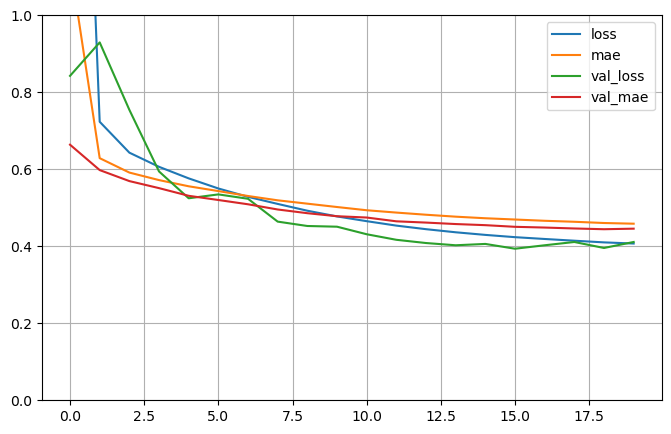

In [34]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Saving and Restoring

In [35]:
model.save("model_regression_API_keras")

INFO:tensorflow:Assets written to: model_regression_API_keras\assets


INFO:tensorflow:Assets written to: model_regression_API_keras\assets


In [36]:
%pwd

'C:\\Users\\User\\ANN-CNN PROJECTS'

In [37]:
del model

In [38]:
keras.backend.clear_session()

In [39]:
model=keras.models.load_model("model_regression_API_keras")

In [40]:
model

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [42]:
y_pred=model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 36ms/step
[[0.5863358]
 [1.6093793]
 [3.39426  ]]


In [43]:
del model
keras.backend.clear_session()

Using Callbacks during Training

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='ReLU',input_shape=[8]),
    keras.layers.Dense(30,activation='ReLU'),
    keras.layers.Dense(1)
])

In [55]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [56]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.keras')

In [48]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.0681 - val_loss: 1.0682
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7506 - val_loss: 0.6815
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6385 - val_loss: 0.6375
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5894 - val_loss: 0.5567
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5531 - val_loss: 0.5126
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5208 - val_loss: 0.4787
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4951 - val_loss: 0.4549
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.4331
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4558 - val_loss: 0.4206
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4424 - val_loss: 0.4109

In [57]:
del model


In [58]:
keras.backend.clear_session()

In [59]:
model=keras.models.load_model("Model-10.keras")

In [60]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 788us/step - loss: 0.4276


Best Model Only

In [61]:
del model

In [62]:
keras.backend.clear_session()

In [63]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='ReLU',input_shape=[8]),
    keras.layers.Dense(30,activation='ReLU'),
    keras.layers.Dense(1)
])

In [66]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [69]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('Best_Model.keras')

In [70]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [72]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4297 - val_loss: 0.4044
Epoch 2/10
363/363 [==============================] - 0s 971us/step - loss: 0.4230 - val_loss: 0.4176
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4174 - val_loss: 0.4116
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4129 - val_loss: 0.4087
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4088 - val_loss: 0.3960
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4051 - val_loss: 0.4188
Epoch 7/10
363/363 [==============================] - 0s 974us/step - loss: 0.4020 - val_loss: 0.4028
Epoch 8/10
363/363 [==============================] - 0s 957us/step - loss: 0.3991 - val_loss: 0.3895
Epoch 9/10
363/363 [==============================] - 0s 953us/step - loss: 0.3963 - val_loss: 0.4006
Epoch 10/10
363/363 [==============================] - 0s 988us/step - loss: 0.3937 - val_lo

In [73]:
model=keras.models.load_model('Best_Model.keras')

In [74]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 674us/step - loss: 0.4246
